In [1]:
#!pip3 install librosa

In [2]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
import wave
import IPython.display as ipd

In [3]:
# Data Preparation

In [4]:
DATAPATH = 'tensorflow-speech-recognition-challenge/train/audio'

In [5]:
dirs = [f for f in os.listdir(DATAPATH) if os.path.isdir(os.path.join(DATAPATH, f))]
dirs.sort()
print('Number of labels: ' + str(len(dirs[1:])))
print(dirs)

Number of labels: 30
['_background_noise_', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


In [6]:
# Target-Labels
LABELS = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

In [7]:
# Here 'yes' folder contains all training audio for 'yes' 
client_code = os.listdir(os.path.join(DATAPATH, 'yes'))
print(client_code[:5])
client_code = [i[0] for i in client_code]
print(client_code[:5])
print(sorted(set(client_code)))
print(len(client_code))

['004ae714_nohash_0.wav', '004ae714_nohash_1.wav', '00f0204f_nohash_0.wav', '00f0204f_nohash_1.wav', '00f0204f_nohash_2.wav']
['0', '0', '0', '0', '0']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f']
2377


In [8]:
# Dividing 'yes' folder into 8 clients
client_1 = ['0','1']
client_2 = ['2', '3']
client_3 = ['4', '5']
client_4 = ['6', '7']
client_5 = ['8', '9']
client_6 = ['a', 'b']
client_7 = ['c', 'd']
client_8 = ['e', 'f']
client_dir = {'0':'client_1', '1':'client_1', '2':'client_2', '3':'client_2', 
              '4':'client_3', '5':'client_3', '6':'client_4', '7':'client_4',
              '8':'client_5', '9':'client_5', 'a':'client_6', 'b':'client_6',
              'c':'client_7', 'd':'client_7', 'e':'client_8', 'f':'client_8'}

In [9]:
from shutil import copyfile

In [22]:
SRC_FOLDER = DATAPATH
DST_FOLDER = 'C:/Users/Riya/Desktop/RHEA/7th sem/Mini Project 2/client _save'

for label in LABELS:
    FILES = os.listdir(os.path.join(DATAPATH, label))
    for file in FILES:
        src = os.path.join(DATAPATH,label,file)
        dst = os.path.join(DST_FOLDER, client_dir[file[0]],label,file)
        try:
            copyfile(src,dst)
        except FileNotFoundError:
            os.mkdir(os.path.join(DST_FOLDER, client_dir[file[0]],label))
            copyfile(src,dst)

In [23]:
x, sr = librosa.load('C:/Users/Riya/Desktop/RHEA/7th sem/Mini Project 2/client _save/client_1/yes/0a9f9af7_nohash_0.wav')
ipd.Audio(x,rate=sr)

In [10]:
DST_FOLDER = 'C:/Users/Riya/Desktop/RHEA/7th sem/Mini Project 2/clients_database'
datapath = os.path.join(DST_FOLDER)
clients = os.listdir(os.path.join(datapath))
clients

['client_1',
 'client_2',
 'client_3',
 'client_4',
 'client_5',
 'client_6',
 'client_7',
 'client_8']

In [11]:
# Feature-extraction

In [12]:
parameters = [1024, 768, 13]
[win_size, hop_size, mfcc_size] = [int(x) for x in parameters]
labels_dir = {'yes':0, 'no':1, 'up':2, 'down':3, 'left':4, 'right':5, 'on':6, 'off':7, 'stop':8, 'go':9 }
X = []
y = []

In [13]:
X1 = []
y1 = []
client_id = 'client_1'
for label in LABELS:
    files = os.listdir(os.path.join(DST_FOLDER, client_id,label))
    print(label,' -> ',len(files))
    for file in files:
        x, fs = librosa.load(os.path.join(DST_FOLDER, client_id, label, file))
        s = librosa.feature.melspectrogram(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)
        mfccs = librosa.feature.mfcc(S=librosa.power_to_db(s), sr=fs, n_mfcc=mfcc_size)

        rms = librosa.feature.rms(y=x, frame_length=win_size, hop_length=hop_size)
        zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=win_size, hop_length=hop_size)
        centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)  
        concat = np.vstack((centroid, zcr, rms, mfccs))
        
        concat = sequence.pad_sequences(concat, 20,dtype=float)
        X1.append(concat.T)
        y1.append(labels_dir[label])  
        X.append(concat.T)
        y.append(labels_dir[label])

yes  ->  272
no  ->  272
up  ->  269
down  ->  257
left  ->  251
right  ->  238
on  ->  255
off  ->  241
stop  ->  256
go  ->  280


In [14]:
X2 = []
y2 = []
client_id = 'client_2'
for label in LABELS:
    files = os.listdir(os.path.join(DST_FOLDER, client_id,label))
    print(label,' -> ',len(files))
    for file in files:
        x, fs = librosa.load(os.path.join(DST_FOLDER, client_id, label, file))
        s = librosa.feature.melspectrogram(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)
        mfccs = librosa.feature.mfcc(S=librosa.power_to_db(s), sr=fs, n_mfcc=mfcc_size)

        rms = librosa.feature.rms(y=x, frame_length=win_size, hop_length=hop_size)
        zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=win_size, hop_length=hop_size)
        centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)  
        concat = np.vstack((centroid, zcr, rms, mfccs))
        
        concat = sequence.pad_sequences(concat, 20,dtype=float)
        X2.append(concat.T)
        y2.append(labels_dir[label])  
        X.append(concat.T)
        y.append(labels_dir[label])

yes  ->  315
no  ->  299
up  ->  327
down  ->  322
left  ->  323
right  ->  312
on  ->  308
off  ->  338
stop  ->  320
go  ->  320


In [15]:
X3 = []
y3 = []
client_id = 'client_3'
for label in LABELS:
    files = os.listdir(os.path.join(DST_FOLDER, client_id,label))
    print(label,' -> ',len(files))
    for file in files:
        x, fs = librosa.load(os.path.join(DST_FOLDER, client_id, label, file))
        s = librosa.feature.melspectrogram(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)
        mfccs = librosa.feature.mfcc(S=librosa.power_to_db(s), sr=fs, n_mfcc=mfcc_size)

        rms = librosa.feature.rms(y=x, frame_length=win_size, hop_length=hop_size)
        zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=win_size, hop_length=hop_size)
        centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)  
        concat = np.vstack((centroid, zcr, rms, mfccs))
        
        concat = sequence.pad_sequences(concat, 20,dtype=float)
        X3.append(concat.T)
        y3.append(labels_dir[label])  
        X.append(concat.T)
        y.append(labels_dir[label])

yes  ->  266
no  ->  245
up  ->  271
down  ->  237
left  ->  263
right  ->  236
on  ->  269
off  ->  249
stop  ->  241
go  ->  252


In [16]:
X4 = []
y4 = []
client_id = 'client_4'
for label in LABELS:
    files = os.listdir(os.path.join(DST_FOLDER, client_id,label))
    print(label,' -> ',len(files))
    for file in files:
        x, fs = librosa.load(os.path.join(DST_FOLDER, client_id, label, file))
        s = librosa.feature.melspectrogram(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)
        mfccs = librosa.feature.mfcc(S=librosa.power_to_db(s), sr=fs, n_mfcc=mfcc_size)

        rms = librosa.feature.rms(y=x, frame_length=win_size, hop_length=hop_size)
        zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=win_size, hop_length=hop_size)
        centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)  
        concat = np.vstack((centroid, zcr, rms, mfccs))
        
        concat = sequence.pad_sequences(concat, 20,dtype=float)
        X4.append(concat.T)
        y4.append(labels_dir[label])  
        X.append(concat.T)
        y.append(labels_dir[label])

yes  ->  303
no  ->  298
up  ->  292
down  ->  286
left  ->  303
right  ->  329
on  ->  334
off  ->  333
stop  ->  313
go  ->  303


In [17]:
X5 = []
y5 = []
client_id = 'client_5'
for label in LABELS:
    files = os.listdir(os.path.join(DST_FOLDER, client_id,label))
    print(label,' -> ',len(files))
    for file in files:
        x, fs = librosa.load(os.path.join(DST_FOLDER, client_id, label, file))
        s = librosa.feature.melspectrogram(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)
        mfccs = librosa.feature.mfcc(S=librosa.power_to_db(s), sr=fs, n_mfcc=mfcc_size)

        rms = librosa.feature.rms(y=x, frame_length=win_size, hop_length=hop_size)
        zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=win_size, hop_length=hop_size)
        centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)  
        concat = np.vstack((centroid, zcr, rms, mfccs))
        
        concat = sequence.pad_sequences(concat, 20,dtype=float)
        X5.append(concat.T)
        y5.append(labels_dir[label])  
        X.append(concat.T)
        y.append(labels_dir[label])

yes  ->  300
no  ->  324
up  ->  303
down  ->  308
left  ->  302
right  ->  302
on  ->  295
off  ->  311
stop  ->  325
go  ->  276


In [18]:
X6 = []
y6 = []
client_id = 'client_6'
for label in LABELS:
    files = os.listdir(os.path.join(DST_FOLDER, client_id,label))
    print(label,' -> ',len(files))
    for file in files:
        x, fs = librosa.load(os.path.join(DST_FOLDER, client_id, label, file))
        s = librosa.feature.melspectrogram(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)
        mfccs = librosa.feature.mfcc(S=librosa.power_to_db(s), sr=fs, n_mfcc=mfcc_size)

        rms = librosa.feature.rms(y=x, frame_length=win_size, hop_length=hop_size)
        zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=win_size, hop_length=hop_size)
        centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)  
        concat = np.vstack((centroid, zcr, rms, mfccs))
        
        concat = sequence.pad_sequences(concat, 20,dtype=float)
        X6.append(concat.T)
        y6.append(labels_dir[label])  
        X.append(concat.T)
        y.append(labels_dir[label])

yes  ->  273
no  ->  319
up  ->  266
down  ->  308
left  ->  263
right  ->  298
on  ->  281
off  ->  278
stop  ->  281
go  ->  285


In [19]:
X7 = []
y7 = []
client_id = 'client_7'
for label in LABELS:
    files = os.listdir(os.path.join(DST_FOLDER, client_id,label))
    print(label,' -> ',len(files))
    for file in files:
        x, fs = librosa.load(os.path.join(DST_FOLDER, client_id, label, file))
        s = librosa.feature.melspectrogram(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)
        mfccs = librosa.feature.mfcc(S=librosa.power_to_db(s), sr=fs, n_mfcc=mfcc_size)

        rms = librosa.feature.rms(y=x, frame_length=win_size, hop_length=hop_size)
        zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=win_size, hop_length=hop_size)
        centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)  
        concat = np.vstack((centroid, zcr, rms, mfccs))
        
        concat = sequence.pad_sequences(concat, 20,dtype=float)
        X7.append(concat.T)
        y7.append(labels_dir[label])  
        X.append(concat.T)
        y.append(labels_dir[label])

yes  ->  342
no  ->  337
up  ->  355
down  ->  362
left  ->  349
right  ->  359
on  ->  337
off  ->  330
stop  ->  313
go  ->  373


In [20]:
X8 = []
y8 = []
client_id = 'client_8'
for label in LABELS:
    files = os.listdir(os.path.join(DST_FOLDER, client_id,label))
    print(label,' -> ',len(files))
    for file in files:
        x, fs = librosa.load(os.path.join(DST_FOLDER, client_id, label, file))
        s = librosa.feature.melspectrogram(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)
        mfccs = librosa.feature.mfcc(S=librosa.power_to_db(s), sr=fs, n_mfcc=mfcc_size)

        rms = librosa.feature.rms(y=x, frame_length=win_size, hop_length=hop_size)
        zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=win_size, hop_length=hop_size)
        centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=win_size, hop_length=hop_size)  
        concat = np.vstack((centroid, zcr, rms, mfccs))
        
        concat = sequence.pad_sequences(concat, 20,dtype=float)
        X8.append(concat.T)
        y8.append(labels_dir[label])  
        X.append(concat.T)
        y.append(labels_dir[label])

yes  ->  306
no  ->  281
up  ->  292
down  ->  279
left  ->  299
right  ->  293
on  ->  288
off  ->  277
stop  ->  331
go  ->  283


In [21]:
type(X8)

list

In [22]:
set(y8)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [23]:
X_all = np.array(X)
y_all = np.array(y)

In [24]:
X = [X1, X2, X3, X4, X5, X6, X7, X8]
y = [y1, y2, y3, y4, y5, y6, y7, y8]

for i in range(len(X)):
    X[i] = np.array(X[i])
    
for i in range(len(y)):
    y[i] = np.array(y[i])
    
print(X_all.shape, y_all.shape)

for i in range(len(X)):
    print(X[i].shape, y[i].shape)

(23682, 20, 16) (23682,)
(2591, 20, 16) (2591,)
(3184, 20, 16) (3184,)
(2529, 20, 16) (2529,)
(3094, 20, 16) (3094,)
(3046, 20, 16) (3046,)
(2852, 20, 16) (2852,)
(3457, 20, 16) (3457,)
(2929, 20, 16) (2929,)


In [25]:
# Plot data distribution

# Not done

In [26]:
from sklearn import preprocessing

encoder = preprocessing.OneHotEncoder(sparse=False)

In [27]:
for i in range(len(y)):
    ytr_reshape = y[i].reshape(-1,1)
    encoder = preprocessing.OneHotEncoder(sparse=False)
    # y -> one hot vector
    y[i] = encoder.fit_transform(ytr_reshape)

In [28]:
ytr_reshape = y_all.reshape(-1,1)
encoder = preprocessing.OneHotEncoder(sparse=False)
# y -> one hot vector
y_all = encoder.fit_transform(ytr_reshape)

In [29]:
# dividing the data

In [30]:
x_train, x_test, y_train, y_test = [None]*8, [None]*8, [None]*8, [None]*8

In [31]:
from sklearn.model_selection import train_test_split
random_seed = 2
for i in range(8):
    x_train[i], x_test[i], y_train[i], y_test[i] = train_test_split(X[i], y[i], test_size=0.1, random_state=random_seed)

In [32]:
# Appending all test data together, to get a global test accuracy

test_X = np.append(x_test[0], x_test[1], axis=0)
test_y = np.append(y_test[0], y_test[1], axis=0)

for i in range(3, 8):
    test_X = np.append(test_X, x_test[i], axis=0)
    test_y = np.append(test_y, y_test[i], axis=0)

In [33]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,TimeDistributed,Flatten,LSTM,Activation,Dropout,Bidirectional,Conv1D,MaxPooling1D

In [34]:
yts = [None]*8
for i in range(len(y)):
    yts[i] = np.argmax(y_test[i], axis=1)

In [35]:
def MODEL():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(20,16)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
    return model

In [179]:
model_cent = MODEL() 

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 128)               74240     
_________________________________________________________________
dense_171 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_172 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_173 (Dense)            (None, 10)                330       
Total params: 84,906
Trainable params: 84,906
Non-trainable params: 0
_________________________________________________________________


In [180]:
history = model_cent.fit(X_all, y_all, epochs=200, callbacks = [callback], verbose=2)

Epoch 1/200
741/741 - 15s - loss: 1.9729 - acc: 0.2583
Epoch 2/200
741/741 - 14s - loss: 1.6292 - acc: 0.4084
Epoch 3/200
741/741 - 29s - loss: 1.4984 - acc: 0.4587
Epoch 4/200
741/741 - 35s - loss: 1.4017 - acc: 0.4971
Epoch 5/200
741/741 - 34s - loss: 1.3252 - acc: 0.5243
Epoch 6/200
741/741 - 34s - loss: 1.2813 - acc: 0.5432
Epoch 7/200
741/741 - 32s - loss: 1.2369 - acc: 0.5640
Epoch 8/200
741/741 - 34s - loss: 1.1963 - acc: 0.5801
Epoch 9/200
741/741 - 33s - loss: 1.1785 - acc: 0.5877
Epoch 10/200
741/741 - 34s - loss: 1.1445 - acc: 0.5959
Epoch 11/200
741/741 - 34s - loss: 1.1349 - acc: 0.5988
Epoch 12/200
741/741 - 36s - loss: 1.1205 - acc: 0.6046
Epoch 13/200
741/741 - 34s - loss: 1.0950 - acc: 0.6147
Epoch 14/200
741/741 - 34s - loss: 1.0790 - acc: 0.6225
Epoch 15/200
741/741 - 34s - loss: 1.0718 - acc: 0.6222
Epoch 16/200
741/741 - 33s - loss: 1.0545 - acc: 0.6315
Epoch 17/200
741/741 - 34s - loss: 1.0440 - acc: 0.6320
Epoch 18/200
741/741 - 34s - loss: 1.0286 - acc: 0.6397
E

Epoch 147/200
741/741 - 36s - loss: 0.6902 - acc: 0.7538
Epoch 148/200
741/741 - 36s - loss: 0.6930 - acc: 0.7542
Epoch 149/200
741/741 - 36s - loss: 0.6781 - acc: 0.7582
Epoch 150/200
741/741 - 35s - loss: 0.6861 - acc: 0.7531
Epoch 151/200
741/741 - 35s - loss: 0.6865 - acc: 0.7565
Epoch 152/200
741/741 - 36s - loss: 0.6802 - acc: 0.7570
Epoch 153/200
741/741 - 35s - loss: 0.6786 - acc: 0.7611
Epoch 154/200
741/741 - 34s - loss: 0.6840 - acc: 0.7579
Epoch 155/200
741/741 - 35s - loss: 0.6833 - acc: 0.7575
Epoch 156/200
741/741 - 34s - loss: 0.6889 - acc: 0.7548
Epoch 157/200
741/741 - 35s - loss: 0.7040 - acc: 0.7507
Epoch 158/200
741/741 - 35s - loss: 0.7066 - acc: 0.7513
Epoch 159/200
741/741 - 35s - loss: 0.6971 - acc: 0.7516
Epoch 160/200
741/741 - 35s - loss: 0.6788 - acc: 0.7582
Epoch 161/200
741/741 - 35s - loss: 0.6798 - acc: 0.7586
Epoch 162/200
741/741 - 35s - loss: 0.6846 - acc: 0.7567
Epoch 163/200
741/741 - 35s - loss: 0.6762 - acc: 0.7589
Epoch 164/200
741/741 - 35s - l

C:\python3\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


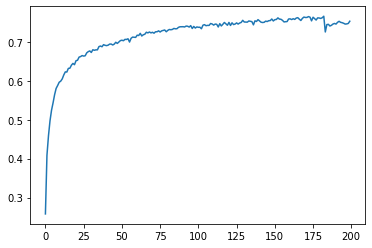

In [181]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(history.history['acc'])
plt.show()

In [182]:
model_cent.evaluate(test_X,  test_y, verbose=2)

67/67 - 1s - loss: 0.6700 - acc: 0.7565


[0.6699533462524414, 0.7564889192581177]

In [37]:
models = [None]*8
for i in range(8):
    models[i] = MODEL()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               74240     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 84,906
Trainable params: 84,906
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               74240     
____________________________

In [38]:
models[1].evaluate(x_test[1],  y_test[1], verbose=2)

10/10 - 0s - loss: 2.3342 - acc: 0.0784


[2.3342392444610596, 0.07836990803480148]

In [39]:
models[5].evaluate(x_test[5],  y_test[5], verbose=2)

9/9 - 0s - loss: 2.3495 - acc: 0.1154


[2.349526882171631, 0.11538461595773697]

In [40]:
import tensorflow

In [41]:
class myCallback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,log={}):
        if(log['acc']>0.95):
            self.model.stop_training=True

In [42]:
callback = myCallback()

In [43]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
models = [None]*8
for i in range(8):
    models[i] = MODEL()
    
H = [None]*8
W = [None]*8

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 128)               74240     
_________________________________________________________________
dense_99 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_100 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_101 (Dense)            (None, 10)                330       
Total params: 84,906
Trainable params: 84,906
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 128)               74240     
__________________________

In [70]:
beforeSet = [[]]*8
afterSet = [[]]*8

In [71]:
for i in range(30):
    print('Communication Run: ',i+1)
    for j in range(8):
        H[j] = models[j].fit(x_train[j], y_train[j], validation_split=0.1, epochs=15, callbacks = [callback], verbose=0)
        wt = models[j].get_weights()
        W[j] = np.array(wt)
        
    sum = W[0]
    for j in range(1,8):
        sum += W[j]
        
    mean = sum/8
    
    for j in range(8):
        beforeSet[j].append(models[j].evaluate(x_test[j],  y_test[j], verbose=2)[1])
        models[j].set_weights(mean)
        afterSet[j].append(models[j].evaluate(x_test[j],  y_test[j], verbose=2)[1])
    print()
    
#models[0].evaluate(test_X,  test_y, verbose=2)

Communication Run:  1
9/9 - 0s - loss: 1.4440 - acc: 0.4385
9/9 - 0s - loss: 2.3045 - acc: 0.0962
10/10 - 0s - loss: 1.5270 - acc: 0.4326
10/10 - 0s - loss: 2.3068 - acc: 0.1066
8/8 - 0s - loss: 1.6117 - acc: 0.4506
8/8 - 0s - loss: 2.3047 - acc: 0.0909
10/10 - 0s - loss: 1.5179 - acc: 0.4452
10/10 - 0s - loss: 2.3042 - acc: 0.0839
10/10 - 0s - loss: 1.4345 - acc: 0.4984
10/10 - 0s - loss: 2.3010 - acc: 0.1311
9/9 - 0s - loss: 1.7301 - acc: 0.4056
9/9 - 0s - loss: 2.3067 - acc: 0.0944
11/11 - 0s - loss: 1.5997 - acc: 0.4075
11/11 - 0s - loss: 2.3063 - acc: 0.0838
10/10 - 0s - loss: 1.4040 - acc: 0.4915
10/10 - 0s - loss: 2.3039 - acc: 0.0990

Communication Run:  2
9/9 - 0s - loss: 1.6771 - acc: 0.3154
9/9 - 0s - loss: 2.3611 - acc: 0.1077
10/10 - 0s - loss: 1.7353 - acc: 0.3480
10/10 - 0s - loss: 2.3926 - acc: 0.0784
8/8 - 0s - loss: 1.9210 - acc: 0.2174
8/8 - 0s - loss: 2.3557 - acc: 0.0751
10/10 - 0s - loss: 1.9273 - acc: 0.2806
10/10 - 0s - loss: 2.3678 - acc: 0.0935
10/10 - 0s - lo

9/9 - 0s - loss: 1.0879 - acc: 0.6119
9/9 - 0s - loss: 1.1359 - acc: 0.5559
11/11 - 0s - loss: 1.1839 - acc: 0.5954
11/11 - 0s - loss: 1.1508 - acc: 0.5925
10/10 - 0s - loss: 1.0910 - acc: 0.6382
10/10 - 0s - loss: 1.0796 - acc: 0.6348

Communication Run:  14
9/9 - 0s - loss: 0.9211 - acc: 0.6692
9/9 - 0s - loss: 0.8581 - acc: 0.6808
10/10 - 0s - loss: 1.0830 - acc: 0.5831
10/10 - 0s - loss: 1.0592 - acc: 0.6426
8/8 - 0s - loss: 1.0595 - acc: 0.6403
8/8 - 0s - loss: 1.0442 - acc: 0.6324
10/10 - 0s - loss: 0.9168 - acc: 0.6839
10/10 - 0s - loss: 0.8824 - acc: 0.6935
10/10 - 0s - loss: 0.9914 - acc: 0.6492
10/10 - 0s - loss: 0.9843 - acc: 0.6426
9/9 - 0s - loss: 1.1394 - acc: 0.5944
9/9 - 0s - loss: 1.1142 - acc: 0.6119
11/11 - 0s - loss: 1.1510 - acc: 0.5838
11/11 - 0s - loss: 1.1661 - acc: 0.6012
10/10 - 0s - loss: 1.0357 - acc: 0.6553
10/10 - 0s - loss: 0.9969 - acc: 0.6416

Communication Run:  15
9/9 - 0s - loss: 0.8299 - acc: 0.6500
9/9 - 0s - loss: 0.8318 - acc: 0.6846
10/10 - 0s -

10/10 - 0s - loss: 0.8660 - acc: 0.7304
8/8 - 0s - loss: 0.8253 - acc: 0.7431
8/8 - 0s - loss: 0.8471 - acc: 0.7115
10/10 - 0s - loss: 0.8229 - acc: 0.7419
10/10 - 0s - loss: 0.7458 - acc: 0.7484
10/10 - 0s - loss: 1.0708 - acc: 0.6459
10/10 - 0s - loss: 0.8972 - acc: 0.6787
9/9 - 0s - loss: 0.9387 - acc: 0.6783
9/9 - 0s - loss: 0.9185 - acc: 0.6958
11/11 - 0s - loss: 1.0168 - acc: 0.6301
11/11 - 0s - loss: 1.0725 - acc: 0.6561
10/10 - 0s - loss: 0.9767 - acc: 0.6792
10/10 - 0s - loss: 0.8729 - acc: 0.7099

Communication Run:  27
9/9 - 0s - loss: 0.8466 - acc: 0.7038
9/9 - 0s - loss: 0.8080 - acc: 0.7115
10/10 - 0s - loss: 0.9551 - acc: 0.6834
10/10 - 0s - loss: 0.8388 - acc: 0.7429
8/8 - 0s - loss: 0.8695 - acc: 0.7154
8/8 - 0s - loss: 0.8641 - acc: 0.7273
10/10 - 0s - loss: 0.7752 - acc: 0.7355
10/10 - 0s - loss: 0.7025 - acc: 0.7839
10/10 - 0s - loss: 0.9206 - acc: 0.6754
10/10 - 0s - loss: 0.8960 - acc: 0.6656
9/9 - 0s - loss: 1.0074 - acc: 0.6853
9/9 - 0s - loss: 0.9122 - acc: 0.7

In [120]:
print('User costumized model: ')
for j in range(8):
    H[j] = models[j].fit(x_train[j], y_train[j], validation_split=0.1, epochs=15, callbacks = [callback], verbose=0)
    wt = models[j].get_weights()
    W[j] = np.array(wt)

sum = W[0]
for j in range(1,8):
    sum += W[j]

mean = sum/8

for j in range(8):
    print(models[j].evaluate(test_X, test_y, verbose=2)[1])
    models[j].set_weights(mean)
    print(models[j].evaluate(test_X, test_y, verbose=2)[1])
print()
    
#models[0].evaluate(test_X,  test_y, verbose=2)

User costumized model: 
67/67 - 1s - loss: 0.9712 - acc: 0.6999
0.6998584270477295
67/67 - 0s - loss: 0.8623 - acc: 0.7131
0.7130721807479858
67/67 - 0s - loss: 0.9761 - acc: 0.6692
0.6691835522651672
67/67 - 0s - loss: 0.8623 - acc: 0.7131
0.7130721807479858
67/67 - 0s - loss: 1.0107 - acc: 0.6782
0.6781500577926636
67/67 - 0s - loss: 0.8623 - acc: 0.7131
0.7130721807479858
67/67 - 0s - loss: 1.0177 - acc: 0.6739
0.6739028096199036
67/67 - 1s - loss: 0.8623 - acc: 0.7131
0.7130721807479858
67/67 - 0s - loss: 1.0203 - acc: 0.6635
0.6635205149650574
67/67 - 0s - loss: 0.8623 - acc: 0.7131
0.7130721807479858
67/67 - 0s - loss: 1.0410 - acc: 0.6772
0.6772062182426453
67/67 - 0s - loss: 0.8623 - acc: 0.7131
0.7130721807479858
67/67 - 0s - loss: 0.9141 - acc: 0.6942
0.6941953897476196
67/67 - 0s - loss: 0.8623 - acc: 0.7131
0.7130721807479858
67/67 - 0s - loss: 1.0371 - acc: 0.6852
0.6852288842201233
67/67 - 0s - loss: 0.8623 - acc: 0.7131
0.7130721807479858



In [170]:
x = np.arange(30)

In [112]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [116]:
beforeSet[7] == beforeSet[0]

True

In [102]:
import pandas as pd

In [144]:
df = {}

In [145]:
df['Client1'] = []
df['Client2'] = []
df['Client3'] = []
df['Client4'] = []
df['Client5'] = []
df['Client6'] = []
df['Client7'] = []
df['Client8'] = []

In [146]:
n = len(beforeSet[0])
i = 0
while i<n:
    df['Client1'].append(beforeSet[0][i])
    df['Client2'].append(beforeSet[0][i+1])
    df['Client3'].append(beforeSet[0][i+2])
    df['Client4'].append(beforeSet[0][i+3])
    df['Client5'].append(beforeSet[0][i+4])
    df['Client6'].append(beforeSet[0][i+5])
    df['Client7'].append(beforeSet[0][i+6])
    df['Client8'].append(beforeSet[0][i+7])
    i += 8

In [147]:
len(df['Client1'])

30

C:\python3\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


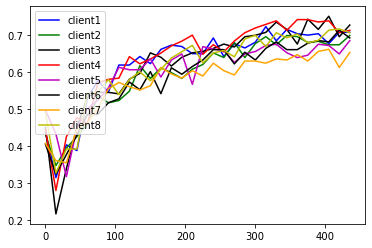

In [151]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(x,df['Client1'],c='b',label='client1')
ax.plot(x,df['Client2'],c='g',label='client2')
ax.plot(x,df['Client3'],c='k',label='client3')
ax.plot(x,df['Client4'],c='r',label='client4')
ax.plot(x,df['Client5'],c='m',label='client5')
ax.plot(x,df['Client6'],c='k',label='client6')
ax.plot(x,df['Client7'],c='orange',label='client7')
ax.plot(x,df['Client8'],c='y',label='client8')

plt.legend(loc=2)
plt.draw()

C:\python3\Python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


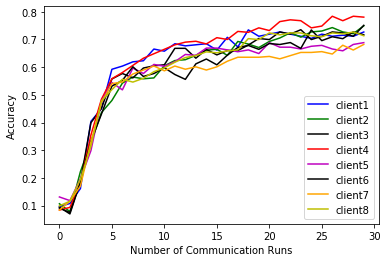

In [171]:
df1 = {}

df1['Client1'] = []
df1['Client2'] = []
df1['Client3'] = []
df1['Client4'] = []
df1['Client5'] = []
df1['Client6'] = []
df1['Client7'] = []
df1['Client8'] = []

n = len(afterSet[0])
i = 0
while i<n:
    df1['Client1'].append(afterSet[0][i])
    df1['Client2'].append(afterSet[0][i+1])
    df1['Client3'].append(afterSet[0][i+2])
    df1['Client4'].append(afterSet[0][i+3])
    df1['Client5'].append(afterSet[0][i+4])
    df1['Client6'].append(afterSet[0][i+5])
    df1['Client7'].append(afterSet[0][i+6])
    df1['Client8'].append(afterSet[0][i+7])
    i += 8
    
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(x,df1['Client1'],c='b',label='client1')
ax.plot(x,df1['Client2'],c='g',label='client2')
ax.plot(x,df1['Client3'],c='k',label='client3')
ax.plot(x,df1['Client4'],c='r',label='client4')
ax.plot(x,df1['Client5'],c='m',label='client5')
ax.plot(x,df1['Client6'],c='k',label='client6')
ax.plot(x,df1['Client7'],c='orange',label='client7')
ax.plot(x,df1['Client8'],c='y',label='client8')

plt.xlabel('Number of Communication Runs')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.draw()

C:\python3\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


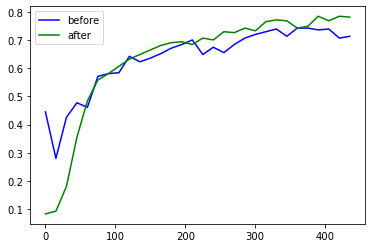

In [166]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(x,df['Client4'],c='b', label='before')
ax.plot(x,df1['Client4'],c='g',label='after')

plt.legend(loc=2)
plt.draw()

In [160]:
afterSet[0]

[0.09615384787321091,
 0.10658307373523712,
 0.09090909361839294,
 0.08387096971273422,
 0.13114753365516663,
 0.09440559148788452,
 0.08381503075361252,
 0.09897611290216446,
 0.10769230872392654,
 0.07836990803480148,
 0.07509881258010864,
 0.09354838728904724,
 0.1180327832698822,
 0.0699300691485405,
 0.11560693383216858,
 0.11604095250368118,
 0.16153846681118011,
 0.222570538520813,
 0.18577075004577637,
 0.1806451678276062,
 0.19672131538391113,
 0.18531468510627747,
 0.17052023112773895,
 0.19453924894332886,
 0.4038461446762085,
 0.3260188102722168,
 0.39920949935913086,
 0.35483869910240173,
 0.2983606457710266,
 0.3321678340435028,
 0.32947975397109985,
 0.3139931857585907,
 0.44999998807907104,
 0.43573668599128723,
 0.45059287548065186,
 0.4838709533214569,
 0.4754098355770111,
 0.4300699234008789,
 0.47109827399253845,
 0.4778156876564026,
 0.5923076868057251,
 0.47962382435798645,
 0.5573122501373291,
 0.5580645203590393,
 0.5442622900009155,
 0.5314685106277466,
 0.5404

In [161]:
df1

{'Client1': [0.4384615421295166,
  0.3153846263885498,
  0.4038461446762085,
  0.38846153020858765,
  0.5307692289352417,
  0.5769230723381042,
  0.5461538434028625,
  0.6192307472229004,
  0.6192307472229004,
  0.642307698726654,
  0.6230769157409668,
  0.6615384817123413,
  0.6730769276618958,
  0.6692307591438293,
  0.6499999761581421,
  0.6499999761581421,
  0.692307710647583,
  0.642307698726654,
  0.6769230961799622,
  0.6653845906257629,
  0.6807692050933838,
  0.7230769395828247,
  0.6846153736114502,
  0.7153846025466919,
  0.7038461565971375,
  0.699999988079071,
  0.7038461565971375,
  0.6769230961799622,
  0.7076923251152039,
  0.7076923251152039],
 'Client2': [0.4326018691062927,
  0.3479623794555664,
  0.39498433470726013,
  0.4263322949409485,
  0.46081504225730896,
  0.5360501408576965,
  0.517241358757019,
  0.5235109925270081,
  0.5485893487930298,
  0.6175548434257507,
  0.5830721259117126,
  0.6112852692604065,
  0.5987460613250732,
  0.5830721259117126,
  0.6081504

In [168]:
print("riya")

riya


In [89]:
models[0].evaluate(test_X,  test_y, verbose=2)

67/67 - 0s - loss: 0.9161 - acc: 0.6871


[0.9160860180854797, 0.6871165633201599]

In [172]:
for j in range(8):
    print('Training accuracy: ',j+1)
    models[j].evaluate(x_train[j],  y_train[j], verbose=2)
    print()

Training accuracy:  1
73/73 - 3s - loss: 0.7175 - acc: 0.7456

Training accuracy:  2
90/90 - 2s - loss: 0.7887 - acc: 0.7229

Training accuracy:  3
72/72 - 1s - loss: 0.7519 - acc: 0.7438

Training accuracy:  4
87/87 - 1s - loss: 0.7204 - acc: 0.7453

Training accuracy:  5
86/86 - 1s - loss: 0.7356 - acc: 0.7421

Training accuracy:  6
81/81 - 1s - loss: 0.7348 - acc: 0.7408

Training accuracy:  7
98/98 - 1s - loss: 0.8610 - acc: 0.7043

Training accuracy:  8
83/83 - 1s - loss: 0.7349 - acc: 0.7470



In [176]:
models_central = [None]*8
for i in range(8):
    models_central[i] = MODEL()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 128)               74240     
_________________________________________________________________
dense_147 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_148 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_149 (Dense)            (None, 10)                330       
Total params: 84,906
Trainable params: 84,906
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 128)               74240     
__________________________

In [177]:
for j in range(8):
    models_central[j].fit(x_train[j], y_train[j], validation_split=0.1, epochs=450, callbacks = [callback], verbose=0)

    models_central[j].evaluate(x_test[j], y_test[j], verbose=2)
    print('Central Data Training: ',j+1)
    models_central[j].evaluate(test_X,  test_y, verbose=2)
    print()

9/9 - 0s - loss: 1.5460 - acc: 0.6346
Central Data Training:  1
67/67 - 0s - loss: 2.6468 - acc: 0.5375

10/10 - 0s - loss: 2.1188 - acc: 0.5517
Central Data Training:  2
67/67 - 0s - loss: 2.6406 - acc: 0.5040

8/8 - 0s - loss: 2.7877 - acc: 0.5336
Central Data Training:  3
67/67 - 0s - loss: 2.7585 - acc: 0.5451

10/10 - 0s - loss: 1.5788 - acc: 0.6613
Central Data Training:  4
67/67 - 1s - loss: 2.2937 - acc: 0.5894

10/10 - 0s - loss: 1.8390 - acc: 0.5869
Central Data Training:  5
67/67 - 1s - loss: 2.2682 - acc: 0.5234

9/9 - 0s - loss: 2.4076 - acc: 0.5699
Central Data Training:  6
67/67 - 0s - loss: 2.4757 - acc: 0.5493

11/11 - 0s - loss: 2.4092 - acc: 0.4682
Central Data Training:  7
67/67 - 0s - loss: 2.5073 - acc: 0.4889

10/10 - 0s - loss: 1.9764 - acc: 0.6280
Central Data Training:  8
67/67 - 0s - loss: 2.2288 - acc: 0.5842



In [178]:
for j in range(8):
    print('Training accuracy: ',j+1)
    models_central[j].evaluate(x_train[j],  y_train[j], verbose=2)
    print()

Training accuracy:  1
73/73 - 1s - loss: 0.5130 - acc: 0.8670

Training accuracy:  2
90/90 - 1s - loss: 0.6291 - acc: 0.7948

Training accuracy:  3
72/72 - 1s - loss: 0.4632 - acc: 0.8629

Training accuracy:  4
87/87 - 1s - loss: 0.3696 - acc: 0.9145

Training accuracy:  5
86/86 - 1s - loss: 0.5529 - acc: 0.8256

Training accuracy:  6
81/81 - 1s - loss: 0.5076 - acc: 0.8636

Training accuracy:  7
98/98 - 1s - loss: 0.6348 - acc: 0.8142

Training accuracy:  8
83/83 - 1s - loss: 0.4619 - acc: 0.8676



In [98]:
for j in range(8):
    print('Training accuracy: ',j+1)
    models_central[j].evaluate(x_test[j],  y_test[j], verbose=2)
    print()

Training accuracy:  1
9/9 - 0s - loss: 1.1181 - acc: 0.6577

Training accuracy:  2
10/10 - 0s - loss: 1.3695 - acc: 0.5799

Training accuracy:  3
8/8 - 0s - loss: 1.7086 - acc: 0.5178

Training accuracy:  4
10/10 - 0s - loss: 1.2798 - acc: 0.6194

Training accuracy:  5
10/10 - 0s - loss: 1.4499 - acc: 0.5672

Training accuracy:  6
9/9 - 0s - loss: 1.5951 - acc: 0.5524

Training accuracy:  7
11/11 - 0s - loss: 1.4315 - acc: 0.5145

Training accuracy:  8
10/10 - 0s - loss: 1.4902 - acc: 0.5631



In [102]:
import pandas as pd

In [111]:
df = pd.read_excel('accuracy.xlsx')

In [113]:
df = df.T

In [115]:
df[0]

1     0.1038
2     0.2000
3     0.2346
4     0.3615
5     0.4423
6     0.4346
7     0.5231
8     0.5654
9     0.5731
10    0.6077
11    0.6462
12    0.6462
13    0.6462
14    0.6769
15    0.6846
16    0.6808
17    0.6846
18    0.6846
19    0.7077
20    0.7346
Name: 0, dtype: float64

In [141]:
x=np.arange(20)
x = x*10

C:\python3\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


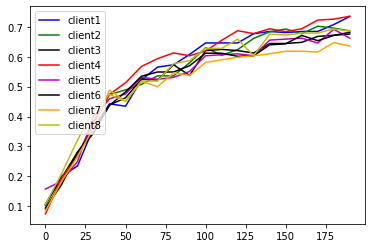

In [144]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(x,df[0],c='b',label='client1')
ax.plot(x,df[1],c='g',label='client2')
ax.plot(x,df[2],c='k',label='client3')
ax.plot(x,df[3],c='r',label='client4')
ax.plot(x,df[4],c='m',label='client5')
ax.plot(x,df[5],c='k',label='client6')
ax.plot(x,df[6],c='orange',label='client7')
ax.plot(x,df[7],c='y',label='client8')

plt.legend(loc=2)
plt.draw()

In [153]:
df = pd.read_excel('acc.xlsx')
df

,Unnamed: 0,Training Accuracy on Individual Data,Testing Accuracy on Global Testing Data
0,client 1,0.6954,0.6871
1,client 2,0.6824,0.6871
2,client 3,0.6599,0.6871
3,client 4,0.6965,0.6871
4,client 5,0.6651,0.6871
5,client 6,0.6898,0.6871
6,client 7,0.6416,0.6871
7,client 8,0.6908,0.6871


C:\python3\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\python3\Python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'centre left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


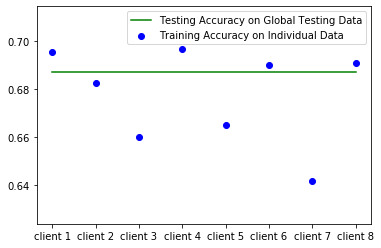

In [161]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.scatter(df['Unnamed: 0'],df['Training Accuracy on Individual Data '],c='b',label='Training Accuracy on Individual Data')
ax.plot(df['Unnamed: 0'],df['Testing Accuracy on Global Testing Data'],c='g',label='Testing Accuracy on Global Testing Data')

plt.legend(loc='centre left')
plt.draw()

In [156]:
df['Unnamed: 0']

0    client 1
1    client 2
2    client 3
3    client 4
4    client 5
5    client 6
6    client 7
7    client 8
Name: Unnamed: 0, dtype: object